# Principal Component Analysis (PCA) And Kmeans vs LDA

## Importing the libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [16]:
dataset = pd.read_csv(r'D:\Collage\TERM 4\Machine Learning\Machine project\Data\heart.csv')



In [17]:
dataset.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [18]:
dataset.shape

(303, 14)

## Clearing null and duplicate values

In [19]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### There is no null value

###

In [20]:
len (dataset[dataset.duplicated()])

1

In [21]:
dataset.drop_duplicates()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Duplicate Data removed

###

In [22]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

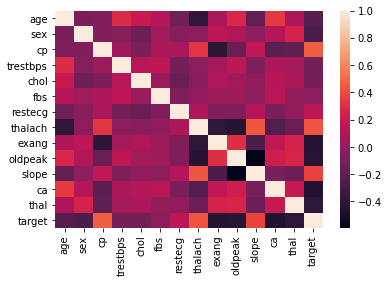

In [23]:
sns.heatmap(dataset.corr(method='spearman', min_periods=1))

form the heat-map notice there may be a cooralltion between target and three factors CP, Thalach and Slope

<AxesSubplot:title={'center':'Correlation with target'}>

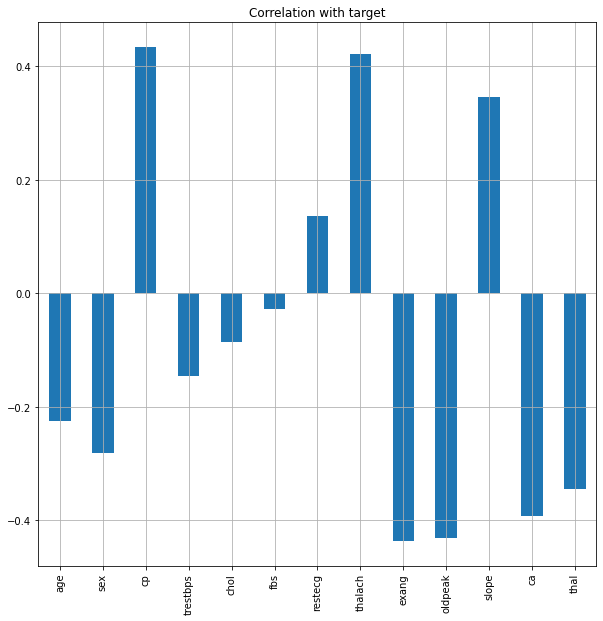

In [24]:
X = dataset.drop('target', axis=1)
y = dataset['target']
X.corrwith(y).plot(kind='bar', grid=True, figsize=(10, 10), title="Correlation with target")

we can use this data to eliminate simmilar coolarting attributes

In [25]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

## Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X , X.shape)
print(y)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]] (303, 13)
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## Training the Kmeans cluster model on the Training set

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_normal= kmeans.fit_predict(X)
print(y_kmeans_normal)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 0]


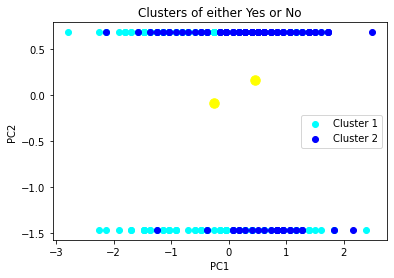

In [28]:
plt.scatter(X[y_kmeans_normal == 0, 0], X[y_kmeans_normal == 0, 1], c = 'cyan', label = 'Cluster 1')
plt.scatter(X[y_kmeans_normal == 1, 0], X[y_kmeans_normal == 1, 1], c = 'blue', label = 'Cluster 2')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1] ,s=90, 
            color="yellow")
plt.title('Clusters of either Yes or No')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [29]:
counter = 0
for i in range(303):
    if y[i] != y_kmeans_normal[i]:
        counter = counter+1

In [30]:
print ('accuarcy of kmeans without PCA = ',(counter/303)*100)

accuarcy of kmeans without PCA =  81.51815181518151


## Applying PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca= pca.fit_transform(X)
print(pca.explained_variance_ratio_*100)


[21.25405312 11.82070772]


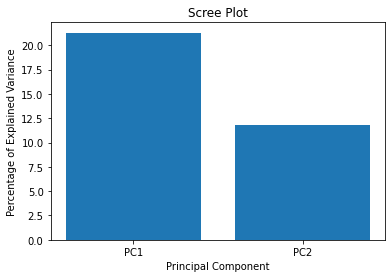

In [32]:

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()




In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_PCA = kmeans.fit_predict(X_pca)
print(y_kmeans_PCA)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 0]


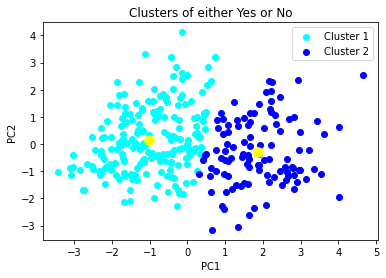

In [34]:
plt.scatter(X_pca[y_kmeans_PCA == 0, 0], X_pca[y_kmeans_PCA == 0, 1], c = 'cyan', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans_PCA == 1, 0], X_pca[y_kmeans_PCA == 1, 1], c = 'blue', label = 'Cluster 2')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1] ,s=90, 
            color="yellow")
plt.title('Clusters of either Yes or No')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [35]:
counter = 0
for i in range(303):
    if y[i] != y_kmeans_PCA[i]:
        counter = counter+1

In [36]:
print ('accuarcy of kmeans after pca = ',(counter/303)*100)

accuarcy of kmeans after pca =  80.52805280528052


## Using LDA in clasfication

In [37]:
X.shape


(303, 13)

In [38]:
from sklearn.model_selection import train_test_split

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_test.shape,X_train,y_test,y_train)

(76, 13) [[ 0.29046364  0.68100522  0.03203122 ...  0.97635214  0.26508221
  -0.51292188]
 [ 0.5110413   0.68100522  1.00257707 ... -0.64911323  0.26508221
  -2.14887271]
 [ 1.39335191  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 ...
 [ 1.61392956  0.68100522  1.97312292 ... -0.64911323  0.26508221
  -0.51292188]
 [-0.92271345  0.68100522 -0.93851463 ...  0.97635214 -0.71442887
   1.12302895]
 [ 0.9521966  -1.46841752  0.03203122 ...  0.97635214  1.24459328
  -0.51292188]] 179    0
228    0
111    1
246    0
60     1
      ..
22     1
258    0
56     1
242    0
114    1
Name: target, Length: 76, dtype: int64 287    0
282    0
197    0
158    1
164    1
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 227, dtype: int64


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_train, y_train)
print("After LDA:\n")
print("Features of size: ", X_lda.shape)
print(X_lda)

After LDA:

Features of size:  (227, 1)
[[ 0.30962152]
 [ 0.62846124]
 [-1.09585506]
 [-1.80586787]
 [-0.13471137]
 [-1.50617284]
 [ 0.37071832]
 [ 0.3038056 ]
 [ 0.35237919]
 [-1.56788959]
 [-3.67393347]
 [ 1.28333572]
 [ 0.45015629]
 [-0.33447716]
 [ 1.52935295]
 [ 2.70341003]
 [ 1.23801646]
 [ 1.5586627 ]
 [ 0.40184487]
 [-0.13471137]
 [ 0.63222217]
 [-1.12904636]
 [ 1.33357231]
 [-0.67992379]
 [ 0.34908855]
 [ 2.39074077]
 [ 0.70686352]
 [-1.79968905]
 [-0.10908848]
 [ 1.1081908 ]
 [ 1.67743378]
 [ 1.50730318]
 [ 0.07005389]
 [-2.00583721]
 [ 1.73957905]
 [ 1.68723912]
 [-2.74614127]
 [ 0.343336  ]
 [-0.01246514]
 [ 0.21101369]
 [-0.49612589]
 [ 1.76295212]
 [ 0.39166766]
 [-1.92518918]
 [-1.0626381 ]
 [-1.94921453]
 [-2.12670496]
 [ 0.02898172]
 [-2.39632027]
 [-2.29164699]
 [ 0.52171031]
 [-1.38727235]
 [-0.65233535]
 [-0.25209574]
 [ 0.10932014]
 [ 1.84027103]
 [-0.82874868]
 [-0.74088156]
 [ 1.8564992 ]
 [ 1.37886927]
 [ 0.07930275]
 [ 0.49195515]
 [-0.65159404]
 [-1.61603552]


In [40]:
prediction = lda.predict(X_test)
counter = 0 
for i in range(76):
    if prediction[i]==y_test.iloc[i]:
        counter = counter + 1

In [41]:
print("accuracy = ",(counter/76)*100)

accuracy =  86.8421052631579
